In [1]:
# Initialize the notebook
using Pkg
Pkg.activate("..")
#include("../src/Particles.jl")
using Particles
using Plots
using Zarr
using ZipFile

nothing

  Activating project at `~/src_nobackup/particles.jl.git_3dflow`


In [2]:
# unzip the test data

# function unzip(file,exdir="")
# extract all files from zip file to exdir
function unzip(file,exdir="")
    fileFullPath = isabspath(file) ?  file : joinpath(pwd(),file)
    basePath = dirname(fileFullPath)
    outPath = (exdir == "" ? basePath : (isabspath(exdir) ? exdir : joinpath(pwd(),exdir)))
    isdir(outPath) ? "" : mkdir(outPath)
    zarchive = ZipFile.Reader(fileFullPath)
    for f in zarchive.files
        fullFilePath = joinpath(outPath,f.name)
        if (endswith(f.name,"/") || endswith(f.name,"\\"))
            mkdir(fullFilePath)
        else
            write(fullFilePath, read(f))
        end
    end
    close(zarchive)
end

unzip("./data/tidal_flume_map.zip","./data")

Base.IOError: IOError: mkdir("/home/verlaan/src_nobackup/particles.jl.git_3dflow/case_tidal_flume/./data/tidal_flume_map.zarr/"; mode=0o777): file already exists (EEXIST)

In [3]:
Zarr_data = ZarrData("./data","tidal_flume_map.zarr")
t0=get_reftime(Zarr_data)
h=initialize_interpolation(Zarr_data,"waterlevel",t0)
u=initialize_interpolation(Zarr_data,"x_velocity",t0)
s=initialize_interpolation(Zarr_data,"salinity",t0)

nothing

In [7]:
# find the extent of the data
xy_bbox=Zarr_data.xy_grid.bbox
z=Zarr_data.zgrid
minz = minimum(z) #scaled
#maxx = maximum(x)
#minx,
#z[1,1,:,1]
size(z)

(128, 1, 21, 1001)

t=1200.0 t=2400.0 

t=3600.0 t=4800.0 

┌ Info: Saved animation to /home/verlaan/src_nobackup/particles.jl.git_3dflow/case_tidal_flume/tidal_flume.gif
└ @ Plots /home/verlaan/.julia/packages/Plots/7VQ5h/src/animation.jl:156


Plots.AnimatedGif("/home/verlaan/src_nobackup/particles.jl.git_3dflow/case_tidal_flume/tidal_flume.gif")
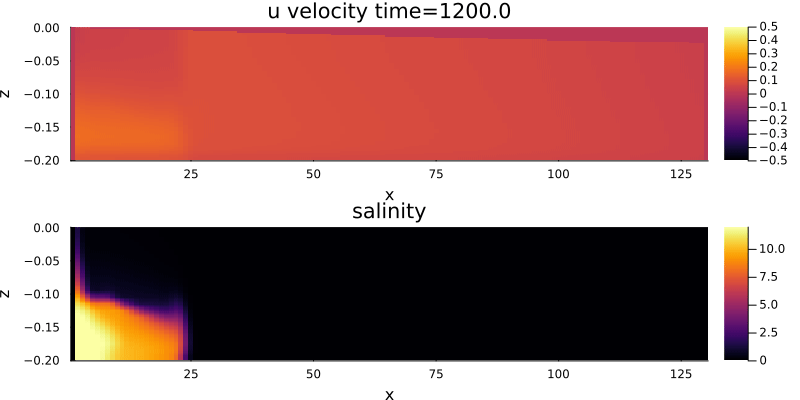

In [23]:
x_left = 1.0
x_right = 130.0
y_middle = 1.0
z_surface = 0.0
z_bottom = -0.2
t_start=1200.0
t_step=60.0
t_stop=5999.0 #max 100minutes=6000s with steps 6s / period is 600s


anim = @animate for t in range(t_start, stop = t_stop, step = t_step)
    if t%1200==0 print("t=$(t) ") end
    # grid for plotting only
    x_points = range(x_left,stop=x_right,length=130)
    z_points = range(z_bottom,stop=z_surface,length=100)
    u_interp = [u(x,y_middle,z,t) for x in x_points, z in z_points] # x velocity
    s_interp = [s(x,y_middle,z,t) for x in x_points, z in z_points] # salinity

    l = @layout([a; b])
    p1=heatmap(x_points,z_points,u_interp',xlabel="x",ylabel="z",title="u velocity time=$(t)",clims=(-0.5,0.5))
    p2=heatmap(x_points,z_points,s_interp',xlabel="x",ylabel="z",title="salinity",clims=(0,12))
    plot(p1,p2,layout=l,size=(800,400))
end

gif(anim, "./tidal_flume.gif", fps = 3)
